In [16]:
import numpy as np
from sklearn.metrics import euclidean_distances
import pandas as pd
import minisom
import LVQ

In [17]:
data = pd.read_csv(r"../data/SD-2X_rocktype.csv")
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
y[y==4] = 0
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=44)

# use Minmaxscaler because we use euclidean distance
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

In [18]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(x_train)
som.train_random(data = x_train, num_iteration = 100)

In [19]:
labels = np.zeros((4, 10, 10))
propa = np.zeros((4, 10, 10))

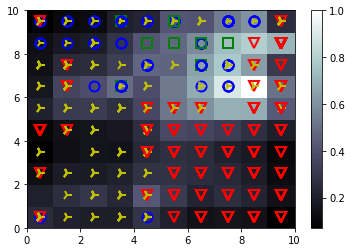

In [20]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['v', 's', 'o', '4']
colors = ['r', 'g', 'b', 'y']
for i, x in enumerate(x_train):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y_train[i]],
         markeredgecolor = colors[y_train[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
    if y_train[i] == 0:
        labels[0, w[0], w[1]] += 1
    elif y_train[i] == 1:
        labels[1, w[0], w[1]] += 1
    elif y_train[i] == 2:
        labels[2, w[0], w[1]] += 1
    elif y_train[i] == 3:
        labels[3, w[0], w[1]] += 1
show()

In [21]:
for i in range(4):
    for j in range(10):
        for k in range(10):
            total = labels[0, j, k] + labels[1, j, k] + labels[2, j, k] + labels[3, j, k]
            if total == 0. :
                continue
            else:
                propa[i, j, k] = labels[i, j, k] / total
                propa[i, j, k] = round(propa[i, j, k], 2)

In [22]:
p_vectors = som.weights

In [23]:
taggings = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        tmp = np.array([labels[0][i][j], labels[1][i][j], labels[2][i][j], labels[3][i][j]])
        sort = tmp.argsort()
        if (tmp[sort[3]] <= tmp[sort[2]] * 5): # must be improve
            taggings[i][j] = np.random.choice([sort[3], sort[2]])
        else:
            taggings[i][j] = sort[3]

In [24]:
def find_closest(in_vector, proto_vectors, labels):
    """
    Find the closest prototype vector for a given vector

    Parameters
    -------
    in_vector: the given vector
    proto_vectors: the set of prototype vectors
    """
    closest_distance = 99999
    for i in range(10):
        for j in range(10):
            if (labels[0, i, j] == 0 and labels[1, i, j] == 0 and labels[2, i, j] == 0 and labels[3, i, j] == 0):
                continue
            else:
                distance = np.linalg.norm(in_vector - proto_vectors[i][j])
                if distance < closest_distance:
                    closest_distance = distance
                    closest = (i, j)         
    return closest

In [25]:
def predict(test_vector, p, taggings, labels):
    position = find_closest(test_vector, p, labels)
    return taggings[position[0], position[1]]

In [26]:
predicted_y1 = [predict(instance, p_vectors, taggings, labels) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y1, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.96      0.91      0.93        54
          1       0.91      0.91      0.91        23
          2       0.44      0.50      0.47         8
          3       0.84      0.87      0.85        47

avg / total       0.88      0.87      0.87       132



In [27]:
data_new = pd.read_csv(r"../data/SD-3X_rocktype.csv")
x_new = data.iloc[:, 0:6].values
y_new = data.iloc[:, 6].values
y_new[y_new == 4] = 0
x_new = minmax.fit_transform(x_new)
predicted_y_new = [predict(instance, p_vectors, taggings, labels) for instance in x_new]

from sklearn.metrics import classification_report

print (classification_report(y_new, predicted_y_new, target_names=['0', '1', '2', '3']))

             precision    recall  f1-score   support

          0       0.93      0.92      0.93       558
          1       0.79      0.94      0.86       165
          2       0.58      0.59      0.58       139
          3       0.84      0.78      0.81       453

avg / total       0.84      0.84      0.84      1315



# Next SOM

In [28]:
# Training the SOM
from minisom import MiniSom
som2 = MiniSom(x = 10, y = 10, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som2.random_weights_init(x_train)
som2.train_random(data = x_train, num_iteration = 100)

In [29]:
labels2 = np.zeros((4, 10, 10))
propa2 = np.zeros((4, 10, 10))

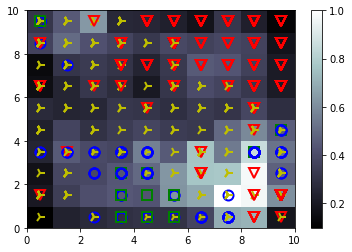

In [30]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som2.distance_map().T)
colorbar()
markers = ['v', 's', 'o', '4']
colors = ['r', 'g', 'b', 'y']
for i, x in enumerate(x_train):
    w = som2.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y_train[i]],
         markeredgecolor = colors[y_train[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
    if y_train[i] == 0:
        labels2[0, w[0], w[1]] += 1
    elif y_train[i] == 1:
        labels2[1, w[0], w[1]] += 1
    elif y_train[i] == 2:
        labels2[2, w[0], w[1]] += 1
    elif y_train[i] == 3:
        labels2[3, w[0], w[1]] += 1
show()

In [31]:
for i in range(4):
    for j in range(10):
        for k in range(10):
            total = labels2[0, j, k] + labels2[1, j, k] + labels2[2, j, k] + labels2[3, j, k]
            if total == 0. :
                continue
            else:
                propa2[i, j, k] = labels2[i, j, k] / total
                propa2[i, j, k] = round(propa2[i, j, k], 2)

In [32]:
p_vectors2 = som2.weights

In [33]:
taggings2 = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        tmp = np.array([labels2[0][i][j], labels2[1][i][j], labels2[2][i][j], labels2[3][i][j]])
        sort = tmp.argsort()
        if (tmp[sort[3]] <= tmp[sort[2]] * 5): # must be improve
            taggings2[i][j] = np.random.choice([sort[3], sort[2]])
        else:
            taggings2[i][j] = sort[3]

In [34]:
predicted_y2 = [predict(instance, p_vectors2, taggings2, labels2) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y2, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.98      0.96      0.97        54
          1       1.00      0.61      0.76        23
          2       0.41      0.88      0.56         8
          3       0.88      0.89      0.88        47

avg / total       0.91      0.87      0.88       132



# Next SOM

In [35]:
# Training the SOM
from minisom import MiniSom
som3 = MiniSom(x = 10, y = 10, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som3.random_weights_init(x_train)
som3.train_random(data = x_train, num_iteration = 100)

In [36]:
labels3 = np.zeros((4, 10, 10))
propa3 = np.zeros((4, 10, 10))

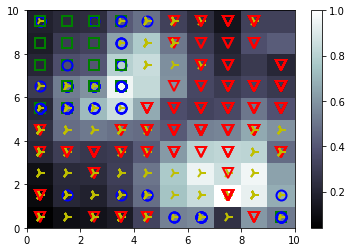

In [37]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som3.distance_map().T)
colorbar()
markers = ['v', 's', 'o', '4']
colors = ['r', 'g', 'b', 'y']
for i, x in enumerate(x_train):
    w = som3.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y_train[i]],
         markeredgecolor = colors[y_train[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
    if y_train[i] == 0:
        labels3[0, w[0], w[1]] += 1
    elif y_train[i] == 1:
        labels3[1, w[0], w[1]] += 1
    elif y_train[i] == 2:
        labels3[2, w[0], w[1]] += 1
    elif y_train[i] == 3:
        labels3[3, w[0], w[1]] += 1
show()

In [38]:
for i in range(4):
    for j in range(10):
        for k in range(10):
            total = labels3[0, j, k] + labels3[1, j, k] + labels3[2, j, k] + labels3[3, j, k]
            if total == 0. :
                continue
            else:
                propa3[i, j, k] = labels3[i, j, k] / total
                propa3[i, j, k] = round(propa3[i, j, k], 2)

In [39]:
p_vectors3 = som3.weights

In [40]:
taggings3 = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        tmp = np.array([labels3[0][i][j], labels3[1][i][j], labels3[2][i][j], labels3[3][i][j]])
        sort = tmp.argsort()
        if (tmp[sort[3]] <= tmp[sort[2]] * 5): # must be improve
            taggings3[i][j] = np.random.choice([sort[3], sort[2]])
        else:
            taggings3[i][j] = sort[3]

In [41]:
predicted_y3 = [predict(instance, p_vectors3, taggings3, labels3) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y3, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.96      0.94      0.95        54
          1       0.94      0.65      0.77        23
          2       0.75      0.38      0.50         8
          3       0.75      0.94      0.83        47

avg / total       0.87      0.86      0.85       132



In [42]:
ensemble = [np.asarray(predicted_y1), np.asarray(predicted_y2), np.asarray(predicted_y3)]

In [43]:
predict = [np.bincount([ensemble[j][i] for j in range(3)]).argmax() for i in range(len(ensemble[1]))]

In [44]:
print (classification_report(y_test, predict, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.96      0.96      0.96        54
          1       1.00      0.78      0.88        23
          2       0.71      0.62      0.67         8
          3       0.85      0.96      0.90        47

avg / total       0.91      0.91      0.91       132



In [45]:
mapping = som.win_map(x_train)
mapping2 = som2.win_map(x_train)
mapping3 = som3.win_map(x_train)

In [46]:
result = np.array([])
for sample in x_test:
    pos1 = find_closest(sample, p_vectors, labels)
    pos2 = find_closest(sample, p_vectors2, labels2)
    pos3 = find_closest(sample, p_vectors3, labels3)
    l1 = len(mapping[pos1])
    l2 = len(mapping[pos2])
    l3 = len(mapping[pos3])
#     (pro1, pro2, pro3, pro4) = ((l1*propa[pos1]))
    pro1 = (l1*propa[0, pos1[0], pos1[1]] + l2*propa2[0, pos2[0], pos2[1]] + l3*propa3[0, pos3[0], pos3[1]])/(l1+l2+l3)
    pro2 = (l1*propa[1, pos1[0], pos1[1]] + l2*propa2[1, pos2[0], pos2[1]] + l3*propa3[1, pos3[0], pos3[1]])/(l1+l2+l3)
    pro3 = (l1*propa[2, pos1[0], pos1[1]] + l2*propa2[2, pos2[0], pos2[1]] + l3*propa3[2, pos3[0], pos3[1]])/(l1+l2+l3)
    pro4 = (l1*propa[3, pos1[0], pos1[1]] + l2*propa2[3, pos2[0], pos2[1]] + l3*propa3[3, pos3[0], pos3[1]])/(l1+l2+l3)
    tmp = np.argmax(np.array([pro1, pro2, pro3, pro4]))
    result = np.append(result, tmp)

In [47]:
from sklearn.metrics import classification_report

print (classification_report(y_test, result, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97        54
          1       0.95      0.87      0.91        23
          2       0.55      0.75      0.63         8
          3       0.93      0.89      0.91        47

avg / total       0.93      0.92      0.92       132



In [48]:
data_new = pd.read_csv(r"../data/SD-3X_rocktype.csv")
x_new = data.iloc[:, 0:6].values
y_new = data.iloc[:, 6].values
y_new[y_new == 4] = 0
x_new = minmax.fit_transform(x_new)

In [49]:
result2 = np.array([])
for sample in x_new:
    pos1 = find_closest(sample, p_vectors, labels)
    pos2 = find_closest(sample, p_vectors2, labels2)
    pos3 = find_closest(sample, p_vectors3, labels3)
    l1 = len(mapping[pos1])
    l2 = len(mapping[pos2])
    l3 = len(mapping[pos3])
#     (pro1, pro2, pro3, pro4) = ((l1*propa[pos1]))
    pro1 = (l1*propa[0, pos1[0], pos1[1]] + l2*propa2[0, pos2[0], pos2[1]] + l3*propa3[0, pos3[0], pos3[1]])/(l1+l2+l3)
    pro2 = (l1*propa[1, pos1[0], pos1[1]] + l2*propa2[1, pos2[0], pos2[1]] + l3*propa3[1, pos3[0], pos3[1]])/(l1+l2+l3)
    pro3 = (l1*propa[2, pos1[0], pos1[1]] + l2*propa2[2, pos2[0], pos2[1]] + l3*propa3[2, pos3[0], pos3[1]])/(l1+l2+l3)
    pro4 = (l1*propa[3, pos1[0], pos1[1]] + l2*propa2[3, pos2[0], pos2[1]] + l3*propa3[3, pos3[0], pos3[1]])/(l1+l2+l3)
    tmp = np.argmax(np.array([pro1, pro2, pro3, pro4]))
    result2 = np.append(result2, tmp)

In [50]:
from sklearn.metrics import classification_report

print (classification_report(y_new, result2, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.96      0.96      0.96       558
          1       0.83      0.93      0.88       165
          2       0.78      0.67      0.72       139
          3       0.90      0.90      0.90       453

avg / total       0.90      0.90      0.90      1315

